# Case Study on Job Market

**Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from kmodes.kmodes import KModes
import os
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

**Reading the data**

In [2]:
df = pd.read_csv('Dataset.csv')

**Analyzing rows and columns**

In [3]:
df.head()

,Job Title,Job URL,Company Name,Company URL,Exp,Salary,Location,Skills,Posted
0,Data Engineer: Machine Learning,https://www.naukri.com/job-listings-data-engin...,IBM,https://www.naukri.com/ibm-jobs-careers-16987,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...,1 Day Ago
1,Data Engineer: Machine Learning,https://www.naukri.com/job-listings-data-engin...,IBM,https://www.naukri.com/ibm-jobs-careers-16987,4-6 Yrs,Not disclosed,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...,4 Days Ago
2,Manager - Machine Learning Engineer ( Data Sci...,https://www.naukri.com/job-listings-manager-ma...,Pylon Management Consulting Pvt Ltd,https://www.naukri.com/pylon-management-consul...,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...,1 Day Ago
3,Data Scientist-Python Machine Learning,https://www.naukri.com/job-listings-data-scien...,Jubna,https://www.naukri.com/premium-service-jobs-ca...,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...,1 Day Ago
4,Senior/Lead Data Scientist - Machine Learning/...,https://www.naukri.com/job-listings-senior-lea...,Squareroot Consulting Pvt Ltd.,https://www.naukri.com/squareroot-consulting-j...,1-6 Yrs,Not disclosed,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...,NaN


In [4]:
df.tail()

,Job Title,Job URL,Company Name,Company URL,Exp,Salary,Location,Skills,Posted
989,Senior Manager - Data Science,https://www.naukri.com/job-listings-senior-man...,Oportun,https://www.naukri.com/oportun-jobs-careers-61...,12-18 Yrs,Not disclosed,Chennai,Pandas|Machine Learning|Python|Data Science|Pr...,1 Day Ago
990,Senior Data Scientist,https://www.naukri.com/job-listings-senior-dat...,Dell,https://www.naukri.com/dell-jobs-careers-27614,8-12 Yrs,Not disclosed,Bangalore/Bengaluru,data science|statistical techniques|machine le...,22 Days Ago
991,Senior Data Scientist,https://www.naukri.com/job-listings-senior-dat...,Philips India Limited,https://www.naukri.com/philips-jobs-careers-49...,8-10 Yrs,Not disclosed,Bangalore/Bengaluru,Computer science|Data management|Coding|Analyt...,NaN
992,Senior Software Engineer : Core Data Platform,https://www.naukri.com/job-listings-senior-sof...,Uber,https://www.naukri.com/uber-jobs-careers-1724396,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Computer science|Backend|Product engineering|M...,15 Days Ago
993,Senior Data Engineering Advisor,https://www.naukri.com/job-listings-senior-dat...,Dell,https://www.naukri.com/dell-jobs-careers-27614,8-12 Yrs,Not disclosed,Bangalore/Bengaluru,MS SQL|Data Engineering|TOLAP|IT Skills|Python...,23 Days Ago


**Getting overall info from the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     994 non-null    object
 1   Job URL       994 non-null    object
 2   Company Name  994 non-null    object
 3   Company URL   994 non-null    object
 4   Exp           994 non-null    object
 5   Salary        994 non-null    object
 6   Location      994 non-null    object
 7   Skills        994 non-null    object
 8   Posted        626 non-null    object
dtypes: object(9)
memory usage: 70.0+ KB


**Getting statistical info from the columns of data**

In [6]:
df.describe()

,Job Title,Job URL,Company Name,Company URL,Exp,Salary,Location,Skills,Posted
count,994,994,994,994,994,994,994,994,626
unique,695,994,524,472,76,73,157,948,32
top,Machine Learning Engineer,https://www.naukri.com/job-listings-data-scien...,Accenture,https://www.naukri.com/premium-jobs-careers-85...,5-10 Yrs,Not disclosed,Bangalore/Bengaluru,algorithms|python|c|code|solid|technical|softw...,1 Day Ago
freq,69,1,64,155,83,889,353,4,114


In [7]:
print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 994
No. of columns in the dataset: 9


**Checking for the null values**

In [8]:
df.isnull().sum()

Job Title         0
Job URL           0
Company Name      0
Company URL       0
Exp               0
Salary            0
Location          0
Skills            0
Posted          368
dtype: int64

In [9]:
for i in df.columns:
    print("column name :",i)
    print("No. of column :",len(df[i].unique()))
    print(df[i].unique())

column name : Job Title
No. of column : 695
['Data Engineer: Machine Learning'
 'Manager - Machine Learning Engineer ( Data Science ) ( Females only )'
 'Data Scientist-Python Machine Learning'
 'Senior/Lead Data Scientist - Machine Learning/Deep Learning'
 'Senior Machine Learning Engineer, NLP'
 'Machine Learning Application Developer'
 'Machine Learning Data Science Practitioner'
 'Software Engineer NLP, Machine Learning'
 'Software Developer - NLP /machine Learning/ Data Science'
 'Software Developer - NLP/ Machine Learning/ Data Science'
 'Machine Learning Architect' 'Machine Learning Applications Engineer'
 'Machine Learning Engineer - Innovation Center Network'
 'Senior AI Engineer - Python/R/Machine Learning'
 'Assistant Manager/ Manager/ Data Scientist - Python/ Machine Learning'
 'Data Scientist (Machine Learning /AI)'
 'Google Cloud Machine Learning Services Data Science Practitioner'
 'Job opening For Machine Learning developer with Wipro'
 'Machine Learning Engineer  - Dee

**Feature Engineering**

In [10]:
df.drop(['Job URL','Posted','Company URL'],axis = 1,inplace = True)

In [11]:
df

,Job Title,Company Name,Exp,Salary,Location,Skills
0,Data Engineer: Machine Learning,IBM,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...
1,Data Engineer: Machine Learning,IBM,4-6 Yrs,Not disclosed,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...
2,Manager - Machine Learning Engineer ( Data Sci...,Pylon Management Consulting Pvt Ltd,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...
3,Data Scientist-Python Machine Learning,Jubna,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...
4,Senior/Lead Data Scientist - Machine Learning/...,Squareroot Consulting Pvt Ltd.,1-6 Yrs,Not disclosed,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...
...,...,...,...,...,...,...
989,Senior Manager - Data Science,Oportun,12-18 Yrs,Not disclosed,Chennai,Pandas|Machine Learning|Python|Data Science|Pr...
990,Senior Data Scientist,Dell,8-12 Yrs,Not disclosed,Bangalore/Bengaluru,data science|statistical techniques|machine le...
991,Senior Data Scientist,Philips India Limited,8-10 Yrs,Not disclosed,Bangalore/Bengaluru,Computer science|Data management|Coding|Analyt...
992,Senior Software Engineer : Core Data Platform,Uber,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Computer science|Backend|Product engineering|M...


## Model Building

**Data Preparation**

In [13]:
df_copy = df.copy()

In [14]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Job Title,Company Name,Exp,Salary,Location,Skills
0,126,214,48,72,6,902
1,126,214,46,72,17,902
2,452,351,67,72,145,262
3,204,248,40,72,128,922
4,604,417,11,72,6,854


In [15]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 4317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 4250.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 4190.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28, cost: 4127.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28, cost: 4094.0
Run 1, iteration: 2/100, moves: 0, cost: 4094.0
Init: initializing centroids
Init: initializing clu

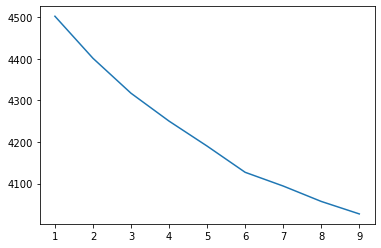

In [16]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [17]:
km_cao = KModes(n_clusters=6, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28, cost: 4127.0


In [18]:
fitClusters_cao

array([3, 3, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 4, 0, 0,
       0, 0, 1, 5, 0, 1, 0, 0, 3, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 5, 0, 0, 5, 4, 4, 4, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 4, 4, 4, 4, 0, 0, 1, 1, 5, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 2, 4, 0, 1, 0, 1, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 4, 4, 0, 1, 0, 0, 1, 0, 0, 4, 0, 3, 1, 0, 0,
       1, 1, 2, 2, 0, 2, 2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 5, 4, 0, 0, 0, 0, 4, 4, 1, 4, 4, 4, 1, 0, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 1, 1, 0, 5, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 1, 0, 4, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1,

In [19]:
df = df_copy.reset_index()

In [20]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [21]:
combinedDf.head()

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
0,Data Engineer: Machine Learning,IBM,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...,3
1,Data Engineer: Machine Learning,IBM,4-6 Yrs,Not disclosed,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...,3
2,Manager - Machine Learning Engineer ( Data Sci...,Pylon Management Consulting Pvt Ltd,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...,0
3,Data Scientist-Python Machine Learning,Jubna,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...,0
4,Senior/Lead Data Scientist - Machine Learning/...,Squareroot Consulting Pvt Ltd.,1-6 Yrs,Not disclosed,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...,0


In [22]:
combinedDf.head()

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
0,Data Engineer: Machine Learning,IBM,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...,3
1,Data Engineer: Machine Learning,IBM,4-6 Yrs,Not disclosed,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...,3
2,Manager - Machine Learning Engineer ( Data Sci...,Pylon Management Consulting Pvt Ltd,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...,0
3,Data Scientist-Python Machine Learning,Jubna,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...,0
4,Senior/Lead Data Scientist - Machine Learning/...,Squareroot Consulting Pvt Ltd.,1-6 Yrs,Not disclosed,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...,0


In [23]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]

In [24]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 2 to 993
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          624 non-null    object
 1   Company Name       624 non-null    object
 2   Exp                624 non-null    object
 3   Salary             624 non-null    object
 4   Location           624 non-null    object
 5   Skills             624 non-null    object
 6   cluster_predicted  624 non-null    uint16
dtypes: object(6), uint16(1)
memory usage: 35.3+ KB


In [25]:
cluster_0.head(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
2,Manager - Machine Learning Engineer ( Data Sci...,Pylon Management Consulting Pvt Ltd,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...,0
3,Data Scientist-Python Machine Learning,Jubna,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...,0
4,Senior/Lead Data Scientist - Machine Learning/...,Squareroot Consulting Pvt Ltd.,1-6 Yrs,Not disclosed,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...,0
10,"Software Engineer NLP, Machine Learning",Global Technologies,7-10 Yrs,Not disclosed,Bangalore/Bengaluru,NLTK|Stanford CoreNLP|Spacy|communication|PyTo...,0
11,Software Developer - NLP /machine Learning/ Da...,Cunesoft,3-5 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Java|Python|Testing|Machine Learning...,0
12,Software Developer - NLP/ Machine Learning/ Da...,Cunesoft,3-5 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Java|Python|Testing|Machine Learning...,0
13,Machine Learning Architect,Netmeds,5-10 Yrs,Not disclosed,Chennai,Design|Data Science|Pattern Recognition|Artifi...,0
14,Machine Learning Applications Engineer,"Qualcomm Technologies, Inc",3-8 Yrs,Not disclosed,Chennai,Computer science|C++|Coding|Staffing|Analytica...,0
18,Senior AI Engineer - Python/R/Machine Learning,Accubits Technologies,5-8 Yrs,Not disclosed,Trivandrum/Thiruvananthapuram,R|Machine Learning|Python|IT Skills|Testing|Bi...,0
20,Data Scientist (Machine Learning /AI),Mastermind Network,4-6 Yrs,Not disclosed,Gurgaon/Gurugram,Tensorflow|Pytorch|deep learning|python|data s...,0


In [26]:
cluster_0.tail(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
913,Data Scientist (H1B Visa Sponsorship),DT4.O Technologies Private Limited,4-6 Yrs,Not disclosed,Hyderabad/Secunderabad,Machine Learning|Deep Learning|Python|IT Skill...,0
916,Data Engineer,Cimpress,1-5 Yrs,Not disclosed,Remote,Java|batches|Hadoop ecosystem|Machine Learning...,0
918,Data Scientist - A Travel Tech company,HotelHub,4-8 Yrs,"5,50,000 - 15,50,000 PA.","Panaji/Panjim, Bangalore/Bengaluru",Data Mining|Machine Learning|Python|IT Skills|...,0
920,Data & Applied Scientist 2,Microsoft,5-9 Yrs,Not disclosed,Hyderabad/Secunderabad,learning|Python|communication|C|data analysis|...,0
922,Hiring Data Scientist || Hanu Software,Hanu Software Solutions,13-21 Yrs,"30,00,000 - 45,00,000 PA.",Remote,Artificial Intelligence|Data Analytics|Machine...,0
923,ML & DS - Technical Content Engineer - Intern,HackerEarth,0-1 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Usage|data science|Coding|Machin...,0
924,Software Engineer,Newzera Tech Labs Pvt Ltd,0-5 Yrs,Not disclosed,Delhi / NCR,Software Development|Machine Learning|IT Skill...,0
925,Customer Support Officer,Align Technology,0-3 Yrs,Not disclosed,Mumbai,Supply chain|Marketing Manager|Payment process...,0
926,AI / ML Engineer,Teksun Microsys Pvt. Ltd.,0-1 Yrs,Not disclosed,Ahmedabad,machine learning|statistical analysis|algorith...,0
928,Senior Data Scientist /Senior Software Engineer,Terawe Technologies Pvt. Ltd.,6-10 Yrs,Not disclosed,"Kochi/Cochin, Hyderabad/Secunderabad, Bangalor...",Pytorch|Tensorflow|Data Science|NLP|Artificial...,0


In [27]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 5 to 951
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          84 non-null     object
 1   Company Name       84 non-null     object
 2   Exp                84 non-null     object
 3   Salary             84 non-null     object
 4   Location           84 non-null     object
 5   Skills             84 non-null     object
 6   cluster_predicted  84 non-null     uint16
dtypes: object(6), uint16(1)
memory usage: 4.8+ KB


In [28]:
cluster_1.head(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
5,"Senior Machine Learning Engineer, NLP",Cactus Global,3-8 Yrs,Not disclosed,Remote,Tensorflow|Data Science|NLP|Artificial Intelli...,1
17,Machine Learning Engineer - Innovation Center ...,SAP India Pvt. Ltd,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Scikit-learn|Machine Learning|TensorFlow|multi...,1
19,Assistant Manager/ Manager/ Data Scientist - P...,Huquo Consulting Pvt. Ltd,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Data Science|Predictive Modeling|NLP|Data wran...,1
46,Assistant Manager/Manager/Data Scientist - Pyt...,Huquo Consulting Pvt. Ltd,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Data Science|Predictive Modeling|Tensorflow|Ke...,1
49,Chief Engineer - Compiler Expert (Machine Lear...,Career Maker,6-11 Yrs,Not disclosed,Bangalore/Bengaluru,MLIR|Machine Learning|GPU|TVM|LLVM|PyTorch|Caf...,1
54,Research Scientist Engineer Machine Learning ...,Career Maker,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,NLP|DNN|Machine Learning|Speech Recognition|C+...,1
55,Machine Learning Researcher - C++/Python,Accubits Technologies,3-8 Yrs,Not disclosed,Trivandrum/Thiruvananthapuram,C++|Machine Learning|Python|CNN|Natural Langua...,1
101,Research Scientist/Engineer - Computer Vision/...,Career Maker,4-9 Yrs,Not disclosed,Hyderabad/Secunderabad,Computer Vision|Machine Learning|OCR|Deep lear...,1
102,"Software Engineer, Machine Learning Operations...",Gojek,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Product engineering|Quality systems|Machine le...,1
126,Artificial Intelligence and Machine Learning ...,Enoah I Solution India Private Limited,3-8 Yrs,Not disclosed,Remote,Artificial Intelligence|Machine Learning|Pytho...,1


In [29]:
cluster_1.tail(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
331,Research Scientist/engineer - Computer Vision/...,Career Maker,10-15 Yrs,Not disclosed,Hyderabad/Secunderabad,IT Skills|Machine Learning|Research Scientist|...,1
370,Machine Learning Engineer - Backend - Pan india,PREZENTIUM India Pvt. Ltd,3-8 Yrs,Not disclosed,Remote,Business communication|Computer vision|deep le...,1
391,Senior Machine learning Engineer - Deep Learni...,Connexions,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Java|Machine learning|Python|IT Skills|Data Sc...,1
410,Research Scientist - Machine Learning/Artifici...,Career Maker,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Artificial Intelligence|Machine Learning|Java|...,1
411,Speech Scientist - Artificial Intelligence/Mac...,Career Maker,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Neural Networks|Human - RobotHuman|Artificial ...,1
414,Speech Scientist - Artificial Intelligence/ Ma...,Career Maker,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,Neural Networks|Human - RobotHuman|Artificial ...,1
415,Machine Learning Scientist,Career Maker,11-15 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Machine Learning|Big Data|Object Det...,1
441,Machine Learning Developer,NIVIDOUS,3-8 Yrs,Not disclosed,"Mumbai, Ahmedabad",deep learning|Manager Quality Assurance|Scalab...,1
445,Research Scientist / Engineer - Computer Visio...,Career Maker,4-9 Yrs,Not disclosed,Hyderabad/Secunderabad,IT Skills|Machine Learning|C++|Multithreading|...,1
446,Research Scientist/Engineer - Computer Vision/...,Career Maker,4-9 Yrs,Not disclosed,Hyderabad/Secunderabad,C++|OCR|Computer Vision|verbal|Image Processin...,1


In [30]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 6 to 986
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          103 non-null    object
 1   Company Name       103 non-null    object
 2   Exp                103 non-null    object
 3   Salary             103 non-null    object
 4   Location           103 non-null    object
 5   Skills             103 non-null    object
 6   cluster_predicted  103 non-null    uint16
dtypes: object(6), uint16(1)
memory usage: 5.8+ KB


In [31]:
cluster_2.head(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
6,Machine Learning Application Developer,Accenture,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,Machine Learning|R code|analytical|Agile|commu...,2
7,Machine Learning Data Science Practitioner,Accenture,12-15 Yrs,Not disclosed,Pune,IT Skills|Python|Data Science|Machine Learning...,2
8,Machine Learning Data Science Practitioner,Accenture,15-18 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Java|Python|Data Science|Machine Lea...,2
9,Machine Learning Data Science Practitioner,Accenture,12-15 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Java|Python|Data Science|Machine Lea...,2
15,Machine Learning Application Developer,Accenture,4-6 Yrs,Not disclosed,Bangalore/Bengaluru,Java Servlet|Machine Learning|analytical|java|...,2
16,Machine Learning Application Developer,Accenture,4-8 Yrs,Not disclosed,Mumbai,IT Skills|Python|Software Development|Machine ...,2
21,Google Cloud Machine Learning Services Data Sc...,Accenture,12-15 Yrs,Not disclosed,Pune,IT Skills|Java|Python|Data Science|Machine Lea...,2
26,Machine Learning Technology Educator,Accenture,12-15 Yrs,Not disclosed,Bangalore/Bengaluru,Azure|Big Data|Deep Learning|Machine Learning|...,2
35,Machine Learning Application Developer,Accenture,4-6 Yrs,Not disclosed,Gurgaon/Gurugram,IT Skills|Java|Python|Testing|Machine Learning...,2
36,ACN - Applied Intelligence - GCP - Machine Lea...,Accenture,2-6 Yrs,Not disclosed,Pune,Production support|SAS|SDLC|Data management|Co...,2


In [32]:
cluster_2.tail(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
567,Data Science Trainer | AI | Machine Learning |...,Careerera,2-7 Yrs,"4,75,000 - 9,75,000 PA.",Noida(Sector-59 Noida),communication|Python|Algorithms|Machine Learni...,2
578,General Analytics Engineer - Machine Learning,Huquo Consulting Pvt. Ltd,2-7 Yrs,Not disclosed,Gurgaon/Gurugram,DL frameworks|Machine Learning|Analytics|Tenso...,2
579,General Analytics Engineer - Machine Learning,Huquo Consulting Pvt. Ltd,2-7 Yrs,Not disclosed,Gurgaon/Gurugram,algorithms|Machine Learning|Analytics|Tensorfl...,2
586,Machine learning Engineer,Azine Web Technologies Private Limited,2-7 Yrs,"3,00,000 - 4,00,000 PA.",Ahmedabad,statistical analysis|Artificial Intelligence|D...,2
587,Job Opportunity || Machine Learning Model Deve...,EHRS HERCOLLEAGUES PRIVATE LIMITED,2-7 Yrs,Not disclosed,Delhi / NCR,Machine Learning|Model Development|Python|spar...,2
596,Machine Learning (NLP),Famepilot Internet,2-7 Yrs,Not disclosed,Gurgaon,Cloud computing|Backend|Front end|Django|Machi...,2
623,Data Analyst - Machine/Deep Learning Algorithms,Huquo Consulting Pvt. Ltd,2-7 Yrs,Not disclosed,"Gurgaon/Gurugram, Delhi / NCR",Algorithms|Machine Learning|Deep Learning|IT S...,2
633,"Machine Learning, SQL - BI Analytics, Mumbai",Samaira HR Solutions,2-7 Yrs,Not disclosed,Mumbai (All Areas),Business Intelligence|SQL Database|Machine Lea...,2
643,Multiple Urgent Opening - ASP.NET / RPA / Mach...,Info-X Software,2-7 Yrs,"2,50,000 - 7,50,000 PA.",Gurgaon/Gurugram(Udyog Vihar),Rpa|ASP.Net|Machine Learning|Python programmin...,2
687,ACN - Applied Intelligence - CC - Data Science...,Accenture,0-5 Yrs,Not disclosed,Gurgaon/Gurugram,Applied Intelligence|Tableau|Data Science|IT S...,2


In [33]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 992
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          58 non-null     object
 1   Company Name       58 non-null     object
 2   Exp                58 non-null     object
 3   Salary             58 non-null     object
 4   Location           58 non-null     object
 5   Skills             58 non-null     object
 6   cluster_predicted  58 non-null     uint16
dtypes: object(6), uint16(1)
memory usage: 3.3+ KB


In [34]:
cluster_3.head(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
0,Data Engineer: Machine Learning,IBM,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...,3
1,Data Engineer: Machine Learning,IBM,4-6 Yrs,Not disclosed,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...,3
52,Senior Software Engineer - Machine Learning,"Saavn, LLC",2-5 Yrs,Not disclosed,Mumbai,Computer science|Data analysis|international t...,3
150,Machine Learning Engineer ( Image Processor),Serviam Manpower,2-5 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",Computer vision|OpenCV|Machine learning|IT Ski...,3
162,"Senior Software Engineer, Machine Learning",Uber,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Software design|Publishing|Machi...,3
167,NLP/Chatbot Engineer - Machine/Deep Learning A...,Info Corporate Service,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,NLP|Chatbot|Machine Learning|spaCy|DialogFlow|...,3
230,Senior Software Engineer - Data Science and ...,VSH SOLUTIONS PRIVATE LIMITED,2-5 Yrs,Not disclosed,Pune,RoR|Java|ElasticSearch|Pandas|MongoDB|Matlab|R...,3
298,Risk Data Scientist - Machine Learning,Righturn,2-5 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Chenn...",Amazon Web Services|Presto|ggplot2|machine lea...,3
303,Product - Data and Machine Learning Platforms,CRED,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Data Science|Communication Skills|Product Mana...,3
354,"Machine Learning Engineer, Image Processing",Hubino Technologies Pvt Ltd,2-5 Yrs,Not disclosed,Chennai,x86|Python|ARM|ETL|CUDA|Computer science|Busin...,3


In [35]:
cluster_3.tail(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
303,Product - Data and Machine Learning Platforms,CRED,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Data Science|Communication Skills|Product Mana...,3
354,"Machine Learning Engineer, Image Processing",Hubino Technologies Pvt Ltd,2-5 Yrs,Not disclosed,Chennai,x86|Python|ARM|ETL|CUDA|Computer science|Busin...,3
375,Machine learning and AI Engineer,Megdap Innovation Labs Private Limited,2-5 Yrs,Not disclosed,Pune,Computer science|C++|GIT|Linux|Image processin...,3
389,Associate Machine Learning Scientist,Wadhwani AI,2-5 Yrs,Not disclosed,Mumbai,Computer science|C++|Coding|Artificial Intelli...,3
431,Senior Machine Learning Engineer,Xome,2-5 Yrs,Not disclosed,Chennai,Data analysis|RDBMS|data security|Debugging|Ma...,3
478,Python and Machine Learning Engineer,Trantor Software Pvt. Ltd.,2-5 Yrs,"2,00,000 - 6,00,000 PA.","Noida, Mohali/SAS Nagar, Chandigarh, New Delhi...",IT Skills|Python|Software Development|Cloud|Ma...,3
482,"Principal Engineer, Machine Learning",Rectras Business Solutions Pvt Ltd.,2-5 Yrs,Not disclosed,Chennai,Computer science|C++|Algorithms|Machine learni...,3
495,Machine Learning Seniors,Walking Tree Consultancy Services pvt Ltd,2-5 Yrs,Not disclosed,"Hyderabad/Secunderabad, New Delhi",Tensorflow|Python|Pandas|Gitlab|written commun...,3
521,Machine Learning Researcher,Cistup Indian Institute of Science,2-5 Yrs,Not disclosed,Bengaluru,Computer science|Computer vision|C++|github|PD...,3
523,Machine Learning,Diverse Lynx,2-5 Yrs,Not disclosed,Bengaluru,IT Skills|Python|Machine Learning|Unix|Text mi...,3


In [36]:
cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 30 to 984
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          67 non-null     object
 1   Company Name       67 non-null     object
 2   Exp                67 non-null     object
 3   Salary             67 non-null     object
 4   Location           67 non-null     object
 5   Skills             67 non-null     object
 6   cluster_predicted  67 non-null     uint16
dtypes: object(6), uint16(1)
memory usage: 3.8+ KB


In [37]:
cluster_4.head(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
30,Senior Machine Learning Engineer,Docsumo,1-3 Yrs,Not disclosed,remote,Python Developer|Machine Learning,4
41,Python Developer - Machine Learning/Data Mining,Huquo Consulting Pvt. Ltd,3-6 Yrs,Not disclosed,Noida,Data Mining|Machine Learning|Python|Predictive...,4
69,Data Engineer - Python/Machine Learning/AWS,Huquo Consulting Pvt. Ltd,6-11 Yrs,Not disclosed,Gurgaon/Gurugram,Machine Learning|AWS|Python|IT Skills|Testing|...,4
70,Data Engineer - Python/Machine Learning/AWS,Huquo Consulting Pvt. Ltd,6-11 Yrs,Not disclosed,Gurgaon/Gurugram,IT Skills|Testing|Machine Learning|Cloud|AWS|A...,4
76,Python Engineer - Machine Learning/Hive,Huquo Consulting Pvt. Ltd,3-7 Yrs,Not disclosed,Bangalore/Bengaluru,Hive|Machine Learning|Python|SQL|IT Skills|Big...,4
77,Python Engineer - Machine Learning/Hive,Huquo Consulting Pvt. Ltd,3-7 Yrs,Not disclosed,Bangalore/Bengaluru,Python|SQL|Hive|Machine Learning|IT Skills|Big...,4
78,Machine Learning SSE,CGI,3-7 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",Data Science|Artificial Intelligence|Machine L...,4
90,Python Developer - Machine Learning/Data Mining,Huquo Consulting Pvt. Ltd,3-6 Yrs,Not disclosed,Noida,Predictive Modeling|R|NLP|data interpretation|...,4
91,Senior Machine Learning Engineer,Gojek,5-11 Yrs,Not disclosed,Bangalore/Bengaluru,Computer science|Training|data science|Machine...,4
95,Analyst - Data Science - Python/Machine Learni...,Huquo Consulting Pvt. Ltd,4-6 Yrs,Not disclosed,Gurgaon/Gurugram,Machine Learning|Analytics|Python|Logistic Reg...,4


In [38]:
cluster_4.tail(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
181,Data Scientist / Machine Learning Engineer,INFISWIFT TECHNOLOGIES,3-7 Yrs,Not disclosed,Pune,Computer science|Data analysis|Image processin...,4
183,Data Scientist / Machine Learning Engineer,Pubmatic,3-7 Yrs,Not disclosed,Pune,Data Gathering|R|Data Scientist|Computer Scien...,4
188,Director - Analytics - Machine Learning - KPO ...,Huquo Consulting Pvt. Ltd,7-10 Yrs,Not disclosed,Gurgaon/Gurugram,Pytorch|TensorFlow|analytics|python libraries|...,4
189,AVP - Cognitive Technologies Architect - NLP/M...,Huquo Consulting Pvt. Ltd,10-12 Yrs,Not disclosed,"Gurgaon/Gurugram, Bangalore/Bengaluru",IT Skills|Java|Python|Data Science|Machine Lea...,4
191,Assistant Vice President - Machine Learning,Huquo Consulting Pvt. Ltd,7-12 Yrs,Not disclosed,"Gurgaon/Gurugram, Delhi / NCR",people management|SAS|Machine Learning|communi...,4
192,Assistant Vice President- Machine Learning- US...,Huquo Consulting Pvt. Ltd,7-12 Yrs,Not disclosed,"Gurgaon/Gurugram, Delhi / NCR",IT Skills|Machine Learning|BPO|Communication S...,4
193,Assistant Manager/Manager - Machine Learning -...,Huquo Consulting Pvt. Ltd,6-9 Yrs,Not disclosed,Gurgaon/Gurugram,Data Modeling|Machine Learning|Statistics|Anal...,4
197,Senior Machine Learning Engineer,Intel,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,Computer science|Product quality|Diagnostics|T...,4
208,Machine Learning Data Scientist,Xamplay,3-7 Yrs,Not disclosed,Bengaluru,Machine learning|data visualization,4
235,Senior Machine Learning Engineer,Observe.AI,3-7 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Java|Python|Machine Learning|Automat...,4


In [39]:
cluster_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 47 to 988
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          58 non-null     object
 1   Company Name       58 non-null     object
 2   Exp                58 non-null     object
 3   Salary             58 non-null     object
 4   Location           58 non-null     object
 5   Skills             58 non-null     object
 6   cluster_predicted  58 non-null     uint16
dtypes: object(6), uint16(1)
memory usage: 3.3+ KB


In [40]:
cluster_5.head(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
47,Machine Learning Engineer (Data Science),Walmart,3-6 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Python|Data Science|Machine Learning...,5
72,Data Scientist - Machine Learning and NLP with...,OpsMx,3-6 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",NLP|Machine Learning|Python|IT Skills|Statisti...,5
75,Artificial Intelligence/ Machine Learning Engi...,iMindYourBusiness,3-6 Yrs,Not disclosed,Bangalore/Bengaluru,R|SAS|MATLAB|IT Skills|Python|Machine Learning...,5
103,Machine Learning Engineer (Software Engineer),Walmart,3-6 Yrs,Not disclosed,Bangalore/Bengaluru,IT Skills|Python|Machine Learning|Cloud|Javasc...,5
114,Data Scientist - Machine Learning,TalPro,3-6 Yrs,Not disclosed,"Gurgaon/Gurugram, Delhi / NCR",Pytorch|NN|Machine Learning|R|Data Science|R -...,5
116,Data Scientist || Machine Learning Engineer ||...,Schlesinger Group,3-6 Yrs,Not disclosed,"Noida, Gurgaon/Gurugram, Delhi / NCR",IT Skills|Python|Data Science|Machine Learning...,5
182,Machine Learning Engineer - Data Modeling/Pred...,Marktine,3-6 Yrs,Not disclosed,Remote,Predictive Modeling|Data Modeling|Machine Lear...,5
217,Senior Software Engineer - Machine Learning & ...,Visa,3-6 Yrs,Not disclosed,Bangalore/Bengaluru,Java|Business Intelligence|Rest|Git|Software E...,5
427,Machine learning- Assistant Professor,Hindustan University,3-6 Yrs,Not disclosed,Bengaluru,Counselor|Mentor|Trainer|Advisor|Educator|Teac...,5
435,Sr machine learning engineer,FACTSET SYSTEMS INDIA PVT LTD,3-6 Yrs,Not disclosed,Hyderabad,IT Skills|Python|Software Development|Data Sci...,5


In [41]:
cluster_5.tail(50)

,Job Title,Company Name,Exp,Salary,Location,Skills,cluster_predicted
427,Machine learning- Assistant Professor,Hindustan University,3-6 Yrs,Not disclosed,Bengaluru,Counselor|Mentor|Trainer|Advisor|Educator|Teac...,5
435,Sr machine learning engineer,FACTSET SYSTEMS INDIA PVT LTD,3-6 Yrs,Not disclosed,Hyderabad,IT Skills|Python|Software Development|Data Sci...,5
444,Machine Learning ML- QA Engg 3-5Yrs of exp For...,SHRIKRISHNA LAXMAN POHNERKAR,3-6 Yrs,"30,00,000 - 45,00,000 PA.",Pune,Algorithms|Pytest|Machine Learning|Java|Test A...,5
452,Software Engineer Machine Learning,AFFINITY GLOBAL INC,3-6 Yrs,Not disclosed,Mumbai,Computer science|Logistic regression|Machine l...,5
498,Machine learning Engineer - New Delhi,ProCURE-HR Services Pvt. Ltd.,3-6 Yrs,Not disclosed,New Delhi,Azure|NLP|Machine Learning|Microsoft Azure Clo...,5
535,AI and Machine Learning,Ajatus,3-6 Yrs,Not disclosed,Bhubaneswar,IT Skills|Java|Python|Data Science|Machine Lea...,5
559,Machine Learning Algorithm Developer,Machinellium Mavericks Projects and Consultants,3-6 Yrs,Not disclosed,Hyderabad,Machine Learning Algorithm Developer|Java|algo...,5
561,Machine Learning Algorithm Developer,Machinellium Mavericks Projects and Consultants,3-6 Yrs,Not disclosed,Hyderabad,Analytical skills|C++|Debugging|Machine learni...,5
621,Java Developer - Backend Development - Machine...,Confidential,3-6 Yrs,Not disclosed,Mumbai,Scrum|object oriented design|patterns|Test Dri...,5
648,Senior Data Scientist,GSK India,10-20 Yrs,Not disclosed,Bangalore/Bengaluru,data analysis|predictive analytics|statistical...,5
